# Neural Network From Scratch

In [1]:
import numpy as np
import pandas as pd
from core_functions import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Data Load and Setup

In [2]:
def load_data(filepath):
    df_train = pd.read_csv(filepath)
    print('Loading data from: ' + filepath)

    return df_train

df_train = load_data('datasets/train.csv')
print(df_train.columns)

Loading data from: datasets/train.csv
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
df_train = df_train[['Age', 'Sex', 'Survived']]
print(df_train.head())

    Age     Sex  Survived
0  22.0    male         0
1  38.0  female         1
2  26.0  female         1
3  35.0  female         1
4  35.0    male         0


In [4]:
df_train.fillna(0, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Survived  891 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 21.0+ KB


In [5]:
def change_gender(x):
    if x == 'male':
        return 0
    elif x == 'female':
        return 1
df_train.Sex = df_train.Sex.apply(change_gender)

In [6]:
# Explore the dataset
m_train = df_train.shape[0]
num_px = df_train.shape[1]

print("Number of training examples: " + str(m_train))
print("df_train shape: " + str(df_train.shape))

Number of training examples: 891
df_train shape: (891, 3)


In [226]:
X = df_train.drop('Survived', axis=1).to_numpy()
y = df_train['Survived'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train = X_train.transpose()
X_test = X_test.transpose()
y_train = y_train.reshape(y_train.shape[0], 1)
y_train = y_train.transpose()
y_test = y_test.reshape(y_test.shape[0], 1)
y_test = y_test.transpose()


print("shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)
print("Shape of X_test", X_test.shape)
print('Shape of y_test', y_test.shape)

shape of X_train (2, 712)
Shape of y_train (1, 712)
Shape of X_test (2, 179)
Shape of y_test (1, 179)


### Building the Model

In [227]:
layer_dims = [2, 15, 10, 5, 1]

In [228]:
def L_layer_model(X, Y, layers_dims, final_activation, learning_rate=0.0075, num_iterations=2500, print_cost=False):
    np.random.seed(1)
    costs = []

    parameters = initialise_parameters(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters, final_activation)

        # Compute cost.
        cost = compute_cost(AL, Y)

        # Backward propagation.
        grads = L_model_backward(AL, Y, caches, final_activation)

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost every 10 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

Cost after iteration 0: 3.379969
Cost after iteration 100: 0.667699
Cost after iteration 200: 0.662965
Cost after iteration 300: 0.665470
Cost after iteration 400: 0.661517
Cost after iteration 500: 0.658114
Cost after iteration 600: 0.655887
Cost after iteration 700: 0.650934
Cost after iteration 800: 0.647226
Cost after iteration 900: 0.643950
Cost after iteration 1000: 0.639521
Cost after iteration 1100: 0.635559
Cost after iteration 1200: 0.632646
Cost after iteration 1300: 0.628702
Cost after iteration 1400: 0.629698
Cost after iteration 1500: 0.611371
Cost after iteration 1600: 0.618387
Cost after iteration 1700: 0.613285
Cost after iteration 1800: 0.607956
Cost after iteration 1900: 0.602955
Cost after iteration 2000: 0.598448
Cost after iteration 2100: 0.594056
Cost after iteration 2200: 0.589838
Cost after iteration 2300: 0.585827
Cost after iteration 2400: 0.581977


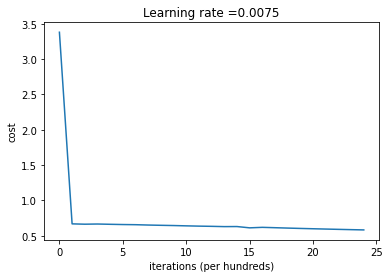

In [229]:
parameters = L_layer_model(X_train, y_train, layer_dims, 'sigmoid', learning_rate=0.0075,
                           num_iterations=2500, print_cost=True)

In [230]:
outputs = predict(X_train, y_train, parameters, 'sigmoid')

Accuracy: 0.7598314606741573


In [231]:
outputs = predict(X_test, y_test, parameters, 'sigmoid')

Accuracy: 0.7653631284916201


In [347]:
def dictionary_to_vector(parameters):
    """
    Roll all our parameters dictionary into a single vector satisfying our specific required shape.
    """
    keys = []
    count = 0
    for key in parameters.keys():
        
        # flatten parameter
        new_vector = np.reshape(parameters[key], (-1,1))
        keys = keys + [key]*new_vector.shape[0]
        
        if count == 0:
            theta = new_vector
        else:
            theta = np.concatenate((theta, new_vector), axis=0)
        count = count + 1

    return theta, keys

def vector_to_dictionary(theta, orig_parameters):
    """
    Unroll all our parameters dictionary from a single vector satisfying our specific required shape.
    """
    parameters = {}
    start = 0
    for key in orig_parameters.keys():
#         print(key)
#         print(orig_parameters[key])
        size1 = orig_parameters[key].shape[0]
        size2 = orig_parameters[key].shape[1]
        finish = start + (size1 * size2)
        parameters[key] = theta[start:finish].reshape((size1, size2))
        start = finish

    return parameters

def gradients_to_vector(gradients):
    """
    Roll all our gradients dictionary into a single vector satisfying our specific required shape.
    """
    
    count = 0
    for key in gradients.keys():
#         print(key)
        # flatten parameter
        new_vector = np.reshape(gradients[key], (-1,1))
#         print('gradients ' + key + ': ' + str(len(gradients[key])))
#         print(gradients[key])
#         print('new_vector: ' + str(len(new_vector)))
        if count == 0:
            theta = new_vector
        else:
            theta = np.concatenate((theta, new_vector), axis=0)
        count = count + 1
    
#         print(len(theta))

    return theta

In [348]:
def gradient_check_n(parameters, gradients, X, Y, epsilon = 1e-7):
    """
    Checks if backward_propagation_n computes correctly the gradient of the cost output by forward_propagation_n
    
    Arguments:
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
    grad -- output of backward_propagation_n, contains gradients of the cost with respect to the parameters. 
    x -- input datapoint, of shape (input size, 1)
    y -- true "label"
    epsilon -- tiny shift to the input to compute approximated gradient with formula(1)
    
    Returns:
    difference -- difference (2) between the approximated gradient and the backward propagation gradient
    """
    
    # Set-up variables
    parameters_values, _ = dictionary_to_vector(parameters)
    grad = gradients_to_vector(gradients)
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    
    # Compute gradapprox
    for i in range(num_parameters):
        
        # Compute J_plus[i]. Inputs: "parameters_values, epsilon". Output = "J_plus[i]".
        # "_" is used because the function you have to outputs two parameters but we only care about the first one
        ### START CODE HERE ### (approx. 3 lines)
        thetaplus = np.copy(parameters_values)                                      # Step 1
        thetaplus[i][0] = thetaplus[i][0] + epsilon                                # Step 2
        _, J_plus[i], _ = L_model_forward11(X, Y, vector_to_dictionary(thetaplus, parameters), 'sigmoid')  # Step 3
        ### END CODE HERE ###
        
        # Compute J_minus[i]. Inputs: "parameters_values, epsilon". Output = "J_minus[i]".
        ### START CODE HERE ### (approx. 3 lines)
        thetaminus = np.copy(parameters_values)                                     # Step 1
        thetaminus[i][0] = thetaminus[i][0] - epsilon                               # Step 2  
        _, J_minus[i], _ = L_model_forward11(X, Y, vector_to_dictionary(thetaminus, parameters), 'sigmoid')  # Step 3
        ### END CODE HERE ###
        
        # Compute gradapprox[i]
        ### START CODE HERE ### (approx. 1 line)
        gradapprox[i] = (J_plus[i] - J_minus[i]) / (2 * epsilon)
        ### END CODE HERE ###
    
    # Compare gradapprox to backward propagation gradients by computing difference.
    ### START CODE HERE ### (approx. 1 line)
    numerator = np.linalg.norm((grad - gradapprox))                               # Step 1'
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)                             # Step 2'
    difference = numerator / denominator                                         # Step 3'
    ### END CODE HERE ###

    if difference > 2e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    
    return difference

In [349]:
def L_model_forward11(X, Y, parameters, final_activation):  # Successfully tested with data
    caches = []
    A = X
    L = len(parameters) // 2

    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], 'relu')
        caches.append(cache)

    # This is the final activation function, the desired type is defined in the variable 'final_activation'
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], final_activation)
    caches.append(cache)

    assert (AL.shape == (1, X.shape[1]))
    
    cost = compute_cost(AL, Y)

    return AL, cost, caches

In [350]:
def L_model_backward11(AL, Y, caches, final_activation):  # Successfully tested with data
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)

    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    current_cache = caches[L - 1]
    grads["dA" + str(L - 1)], grads["dW" + str(L)], grads["db" + str(L)] \
        = linear_activation_backward(dAL, current_cache, final_activation)

    for l in reversed(range(L - 1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads['dA' + str(l + 1)], current_cache, 'relu')
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [363]:
AL, cost, cache = L_model_forward11(X_train, y_train, parameters, 'sigmoid')
gradients = L_model_backward11(AL, y_train, cache, 'sigmoid')
print(gradients.keys())
print(len(gradients['dW3'][0]))
difference = gradient_check_n(parameters, gradients, X_train, y_train)

dict_keys(['dA3', 'dW4', 'db4', 'dA2', 'dW3', 'db3', 'dA1', 'dW2', 'db2', 'dA0', 'dW1', 'db1'])
10


ValueError: operands could not be broadcast together with shapes (23050,1) (266,1) 